## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2
## WEEK 9

# MDP & MONTE CARLO METHODS

### Use the Cliff Walking Environment:
#### https://www.gymlibrary.dev/environments/toy_text/cliff_walking/
### Learn the optimal policy using 500 episodes :
    1. Monte Carlo First Visit
    2. Monte Carlo Every Visit
#### Comment and compare  the methods' performance in terms of the number of steps needed to learn optimal policy and the number of episodes

In [1]:
import gymnasium as gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.bool = bool

In [3]:
def create_epsilon_greedy_policy(Q, epsilon, nA):
    def policy_fn(state):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[state])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [4]:
def mc_control_first_visit(env, num_episodes, gamma=1.0, epsilon=0.1):
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    policy = create_epsilon_greedy_policy(Q, epsilon, env.action_space.n)

    total_rewards = []
    win_count = 0
    goal_state = env.observation_space.n - 1  

    for i_episode in range(1, num_episodes + 1):
        episode = []
        try:
            state = env.reset()[0]
        except TypeError:
            state = env.reset()

        total_reward = 0

        while True:
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            try:
                next_state, reward, terminated, truncated, _ = env.step(action)
                done = terminated or truncated
            except ValueError:
                next_state, reward, done, _ = env.step(action)

            episode.append((state, action, reward))
            total_reward += reward
            state = next_state

            if done:
                if state == goal_state:
                    win_count += 1
                break

        visited = set()
        G = 0
        for t in reversed(range(len(episode))):
            s, a, r = episode[t]
            G = gamma * G + r
            if (s, a) not in visited:
                visited.add((s, a))
                returns_sum[(s, a)] += G
                returns_count[(s, a)] += 1
                Q[s][a] = returns_sum[(s, a)] / returns_count[(s, a)]

        total_rewards.append(total_reward)

    print(f"\nTotal Wins (First Visit): {win_count}")
    print(f"Average Reward (First Visit): {np.mean(total_rewards):.2f}")

    plt.plot(total_rewards)
    plt.title("First Visit MC - Episode Rewards")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid(True)
    plt.show()

    return Q

In [5]:
def mc_control_every_visit(env, num_episodes, gamma=1.0, epsilon=0.1):
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    policy = create_epsilon_greedy_policy(Q, epsilon, env.action_space.n)

    total_rewards = []
    win_count = 0
    goal_state = env.observation_space.n - 1  
    for i_episode in range(1, num_episodes + 1):
        episode = []
        try:
            state = env.reset()[0]
        except TypeError:
            state = env.reset()

        total_reward = 0

        while True:
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            try:
                next_state, reward, terminated, truncated, _ = env.step(action)
                done = terminated or truncated
            except ValueError:
                next_state, reward, done, _ = env.step(action)

            episode.append((state, action, reward))
            total_reward += reward
            state = next_state

            if done:
                if state == goal_state:
                    win_count += 1
                break

        G = 0
        for t in reversed(range(len(episode))):
            s, a, r = episode[t]
            G = gamma * G + r
            returns_sum[(s, a)] += G
            returns_count[(s, a)] += 1
            Q[s][a] = returns_sum[(s, a)] / returns_count[(s, a)]

        total_rewards.append(total_reward)

    print(f"\nTotal Wins (Every Visit): {win_count}")
    print(f"Average Reward (Every Visit): {np.mean(total_rewards):.2f}")

    # Plot reward trend
    plt.plot(total_rewards)
    plt.title("Every Visit MC - Episode Rewards")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid(True)
    plt.show()

    return Q

In [6]:
def print_policy(Q, env):
    policy_grid = []
    action_map = {0: '↑', 1: '→', 2: '↓', 3: '←'}

    nrow, ncol = env.unwrapped.shape

    for row in range(nrow):
        row_policy = []
        for col in range(ncol):
            state = row * ncol + col
            if state in Q:
                best_action = np.argmax(Q[state])
                row_policy.append(action_map[best_action])
            else:
                row_policy.append(' ')
        policy_grid.append(row_policy)

    for row in policy_grid:
        print(' '.join(row))

In [7]:
env = gym.make("CliffWalking-v0")

Monte Carlo First Visit

Total Wins (First Visit): 500
Average Reward (First Visit): -2459.50


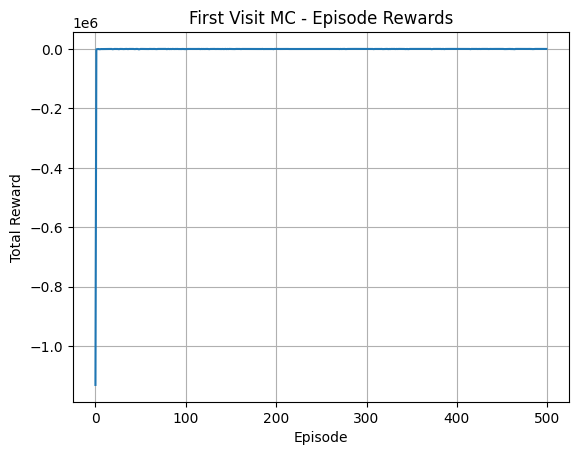


Optimal Policy (Monte Carlo First Visit):
→ → → → → → → → → → ↓ ←
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → ↓
↑ ↓ ↓ ↑ ← ↑ ↑ ↑ ↓ ↓ → ↓
↓                      


In [8]:
print("Monte Carlo First Visit")

Q_first = mc_control_first_visit(env, num_episodes=500)

print("\nOptimal Policy (Monte Carlo First Visit):")
print_policy(Q_first, env)

In [9]:
print("Monte Carlo Every Visit")

Q_every = mc_control_every_visit(env, num_episodes=500)

print("\nOptimal Policy (Monte Carlo Every Visit):")
print_policy(Q_every, env)

Monte Carlo Every Visit


KeyboardInterrupt: 